In [1]:
# 주피터 노트북 환경설정
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

from IPython.core.display import display, HTML
# display(HTML("<style>.container { font-weight: bold !important; font-family:'Malgun Gothic' !important;}</style>"))
# display(HTML("<style>.container { font-weight: bold !important;}</style>"))
# display(HTML("<style>.container { width: 98% !important; }</style>"))

In [3]:
import numpy as np
import pandas as pd
import os

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
%matplotlib inline

# 관련 라이브러리 임포트 
import matplotlib.font_manager as fm

#  한글글꼴로 변경
# plt.rcParams['font.family'] = '한글글꼴명'
plt.rcParams['font.size'] = 11.0
# plt.rcParams['font.family'] = 'batang'
plt.rcParams['font.family'] = 'Malgun Gothic'

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
matplotlib.rcParams['axes.unicode_minus'] = False

# 그래프 기본 크기 설정 
plt.rcParams['figure.figsize'] = [10, 6]

# 퀴즈 

캘리포니아 주택 가격데이타를 스케일링한 후 선형회귀 모델을 정의하고 테스트하여라 
```
|------|------|
| MedInc | 블록의 중간 소득 |
| HouseAge | 블록의 중간 주택 연도 |
| AveRooms | 자치시(town)별 비소매 상업지역 토지 비율 |
| AveBedrms | 찰스 강(Charles River)에 대한 변수 (강의 경계에 위치하면 1, 그렇지 않으면 0) |
| Population | 10,000,000당  일산화질소 농도 |
| AveOccup | 주택 1가구당 평균 방의 수 |
| Latitude | 1940년 이전에 건축된 소유주택 비율 |
| Longitude | 5개의 보스턴 고용 센터까지의 가중 거리 |
```

In [4]:
# 설치 확인 
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()
print(california.keys())
print(california.DESCR)

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block gro

In [5]:
california.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [6]:
# X 데이터 => california.data , 넘파이 
california.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [7]:
# y 데이터
california.target, california.target_names

(array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), ['MedHouseVal'])

In [8]:
len(california.data), len(california.target)

(20640, 20640)

In [9]:
#데이터프레임화
cali_df = pd.DataFrame(california.data, columns=california.feature_names)
cali_df.head(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24


In [10]:
cali_df['MedHouseVal'] = california.target
print('California 데이타셋 크기 :',cali_df.shape)
cali_df.head()

California 데이타셋 크기 : (20640, 9)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [11]:
california.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [13]:
from sklearn.preprocessing import StandardScaler
#latitude, longitude 제외 스케일링
X = cali_df[['MedInc','HouseAge', 'AveRooms','AveBedrms','Population','AveOccup']]
scaler = StandardScaler( )
scaler.fit(X)
temp = scaler.fit_transform(X)
print(type(temp))

X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

<class 'numpy.ndarray'>


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

y_target = cali_df['MedHouseVal']
X_data = cali_df.drop(['MedHouseVal'],axis=1, inplace=False)

X_train , X_test , y_train , y_test = train_test_split(X_data , y_target ,test_size=0.3, random_state=640)

In [15]:
X_train.shape, X_test.shape

((14448, 8), (6192, 8))

In [16]:
#모델 생성
model_lr = LinearRegression()
#학습
model_lr.fit(X_train, y_train)
y_preds = model_lr.predict(X_test)

MSE =  mean_squared_error(y_test, y_preds)

RMSE = np.sqrt(MSE)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(MSE , RMSE))
print('r2_score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 0.529 , RMSE : 0.727
r2_score : 0.594


In [17]:
print('절편 값:', model_lr.intercept_)
print('회귀 계수값:', model_lr.coef_)

절편 값: -36.940881649949226
회귀 계수값: [ 4.46749025e-01  9.80612043e-03 -1.23403167e-01  7.89974830e-01
 -3.56197604e-06 -7.59504171e-03 -4.20740164e-01 -4.33460313e-01]


In [26]:
#리스트 안의 튜플 -> 각 튜플은 (인덱스, 값)
lm_features = ['MedInc','HouseAge', 'AveRooms','AveBedrms','Population','AveOccup', 'Latitude',
 'Longitude']
list(enumerate(lm_features))

[(0, 'MedInc'),
 (1, 'HouseAge'),
 (2, 'AveRooms'),
 (3, 'AveBedrms'),
 (4, 'Population'),
 (5, 'AveOccup'),
 (6, 'Latitude'),
 (7, 'Longitude')]

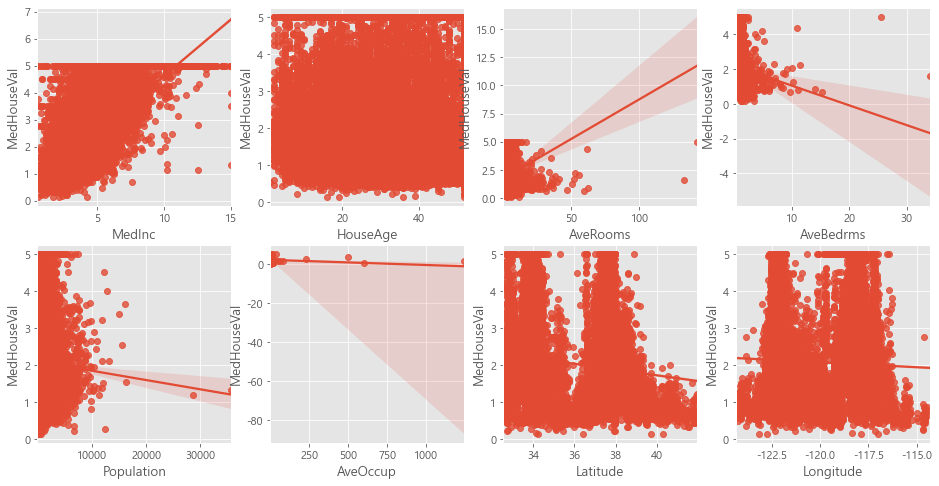

In [27]:
# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 2x4개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(16,8) , ncols=4 , nrows=2)
lm_features = ['MedInc','HouseAge', 'AveRooms','AveBedrms','Population','AveOccup', 'Latitude',
 'Longitude']


for i , feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    # ax=axs[row][col] 서브플랏 
    sns.regplot(x=feature, y='MedHouseVal',data=cali_df , ax=axs[row][col])

In [20]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. index가 컬럼명에 유의
# 가장 큰값 컬럼까지 확인 
coeff = pd.Series(data=np.round(model_lr.coef_, 1), index=X_data.columns )
coeff.sort_values(ascending=False)

AveBedrms     0.8
MedInc        0.4
HouseAge      0.0
Population   -0.0
AveOccup     -0.0
AveRooms     -0.1
Latitude     -0.4
Longitude    -0.4
dtype: float64

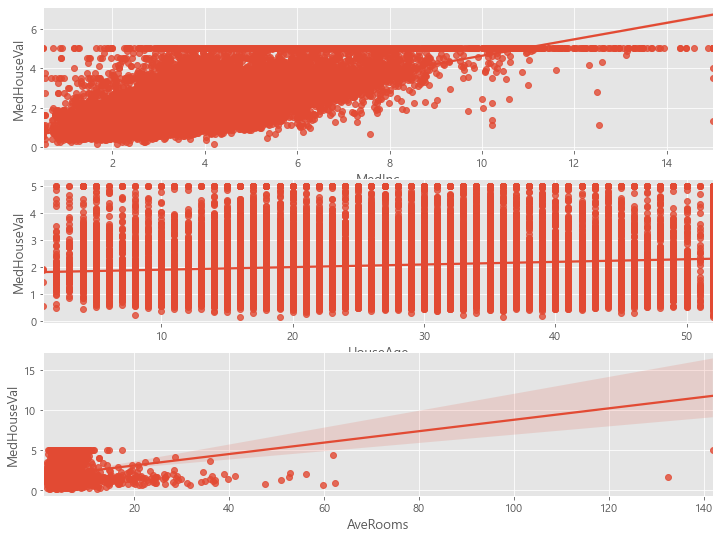

In [28]:
# 1개의 행과 3개의 열을 가진 subplots를 이용. axs는 1x3개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(12,9) , ncols=1 , nrows=3)
lm_features = ['MedInc','HouseAge', 'AveRooms','AveBedrms','Population','AveOccup', 'Latitude',
 'Longitude']

for i , feature in enumerate(lm_features[:3]):
    #     
#     row = int(i/4)
#     col = i%4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    # ax=axs[row][col] 서브플랏 
#     sns.regplot(x=feature , y='PRICE', data=boston_df , ax=axs[row][col])
    sns.regplot(x=feature , y='MedHouseVal', data=cali_df , ax=axs[i])

In [22]:
# 각피처의 기울기 
model_lr.coef_

array([ 4.46749025e-01,  9.80612043e-03, -1.23403167e-01,  7.89974830e-01,
       -3.56197604e-06, -7.59504171e-03, -4.20740164e-01, -4.33460313e-01])

In [23]:
#절편
model_lr.intercept_

-36.940881649949226

In [24]:
X_test.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [30]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [31]:
#실제값과 예측값의 차이를 절대값으로 변환해 평균화
MAE =  mean_absolute_error(y_test, model_lr.predict(X_test))
#예측값과 실제값 차이의 면적의 합
MSE =  mean_squared_error(y_test, model_lr.predict(X_test))
#평균 제곱근 오차
RMSE = np.sqrt(MSE)
#결정계수
R2 = r2_score(y_test, model_lr.predict(X_test))

print(f'MAE =  {MAE}')
print(f'MSE =  {MSE}')
print(f'RMSE =  {RMSE}')
print(f'R2 =  {R2}')

MAE =  0.5252484579363824
MSE =  0.5291474847544593
RMSE =  0.727425243412998
R2 =  0.5941775466868373
